# **Data Analysis**

In [61]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [62]:
ratings_data = pd.read_csv('/ratings.csv')
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [63]:
print(ratings_data.shape)

(100004, 4)


In [64]:
num_users = len(pd.unique(ratings_data['userId']))
print("Number of users:" ,num_users)

Number of users: 671


In [65]:
num_movies = len(pd.unique(ratings_data['movieId']))
print("Number of movies:" ,num_movies)

Number of movies: 9066


Text(0.5, 0, 'Users')

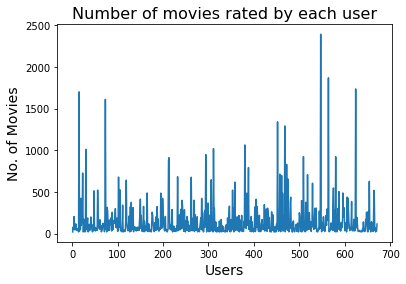

In [66]:
movie_count = ratings_data.groupby("userId").size()
plt.figure()
movie_count.plot()
plt.title("Number of movies rated by each user", fontsize=16)
plt.ylabel("No. of Movies", fontsize=14)
plt.xlabel("Users", fontsize=14)

The above graph shows how **sparse** the data is. While there are 9000+ movies, most users have rated less than 10% of the available movies and a small percentage of the users have rated over 15% of the movies.


Text(0.5, 0, 'Movies')

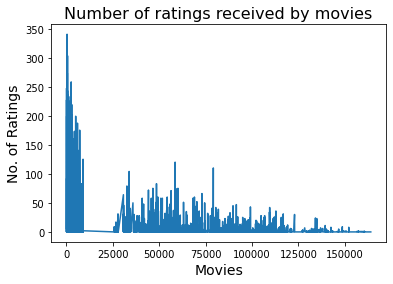

In [67]:
user_count = ratings_data.groupby("movieId").size()
plt.figure()
user_count.dropna().plot()
plt.title("Number of ratings received by movies", fontsize=16)
plt.ylabel("No. of Ratings", fontsize=14)
plt.xlabel("Movies", fontsize=14)

The above graph depicts the "**long tail**" aspect of handling recommendations. What this means is that, there are a few very popular movies that have been rated by a lot of users and most other movies have been rated by very few users. So, while making top-N recommendations it's imporatnt to strike a balance between showing popular stuff and novelty of recommendations.

In [68]:
movies_data = pd.read_csv('/movies.csv')
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [55]:
genres = set()
for s in movies_data['genres'].str.split('|').values:
    genres = genres.union(set(s))
print(np.unique(genres))

[{'Children', 'Documentary', 'Sci-Fi', 'Drama', 'Thriller', 'Action', 'Horror', '(no genres listed)', 'Adventure', 'Crime', 'Romance', 'Animation', 'Mystery', 'Film-Noir', 'Western', 'IMAX', 'Comedy', 'Fantasy', 'Musical', 'War'}]


In [71]:
movie_ratings= pd.merge(ratings_data, movies_data, on='movieId')
movie_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


### All the movies rated by a test user:

In [72]:
test_user = movie_ratings[movie_ratings['userId'] == 85]
test_user

,userId,movieId,rating,timestamp,title,genres
927,85,10,5.0,837507143,GoldenEye (1995),Action|Adventure|Thriller
1811,85,110,5.0,837506903,Braveheart (1995),Action|Drama|War
2248,85,153,4.0,837506803,Batman Forever (1995),Action|Adventure|Comedy|Crime
2370,85,161,4.0,837507117,Crimson Tide (1995),Drama|Thriller|War
2460,85,165,4.0,837506796,Die Hard: With a Vengeance (1995),Action|Crime|Thriller
...,...,...,...,...,...,...
88188,85,275,3.0,837512134,Mixed Nuts (1994),Comedy
88193,85,291,1.0,837512611,Poison Ivy II (1996),Drama|Thriller
88199,85,437,3.0,837512344,Cops and Robbersons (1994),Comedy
88203,85,546,1.0,837512482,Super Mario Bros. (1993),Action|Adventure|Children|Comedy|Fantasy|Sci-Fi
